In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = df.drop('species', axis =1)

# Dendrogram

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
hc_complete = linkage(X, method = 'complete')
hc_ward = linkage(X, method = 'ward')

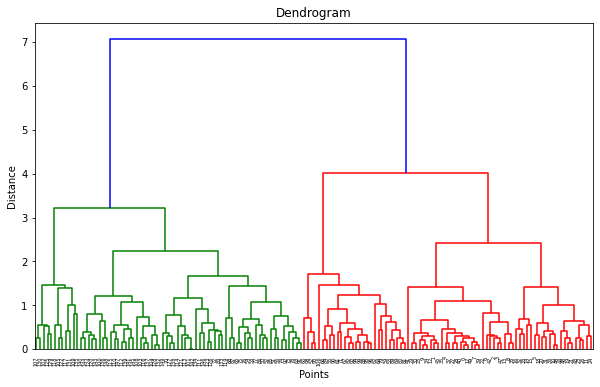

In [7]:
plt.figure(figsize = (10, 6))
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
dendrogram(hc_complete)
plt.show()

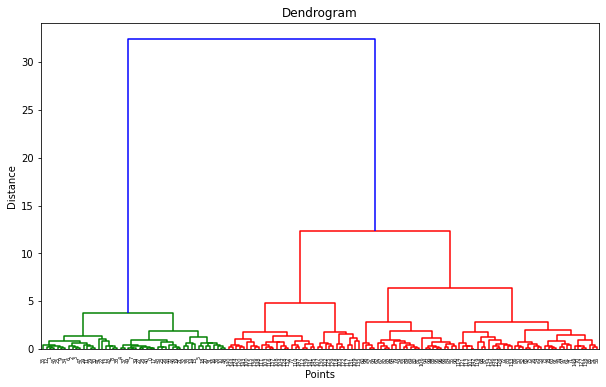

In [8]:
plt.figure(figsize = (10, 6))
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
dendrogram(hc_ward)
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
model = AgglomerativeClustering(n_clusters = 3)  # default linkage = 'ward'

In [11]:
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [12]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

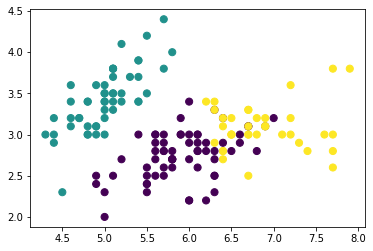

In [13]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = model.labels_, s = 50, cmap = "viridis")

In [14]:
df['predicted_clusters'] = model.labels_

In [15]:
ct = pd.crosstab(df['predicted_clusters'], df['species'])

In [16]:
ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


# Silhouette Score

In [17]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [18]:
print(f'Silhouette Score(n=3): {silhouette_score(X, model.labels_)}')

Silhouette Score(n=3): 0.5543236611296426


# Evaluation

In [25]:
map_dict = {"virginica":2,
             "setosa": 1,
             "versicolor":0}
df["original_classes"] = df.species.map(map_dict)

In [24]:
# df['original_classes']=df['species'].apply(lambda x:1 if x=='setosa' else 2 if x=='virginica' else 0)

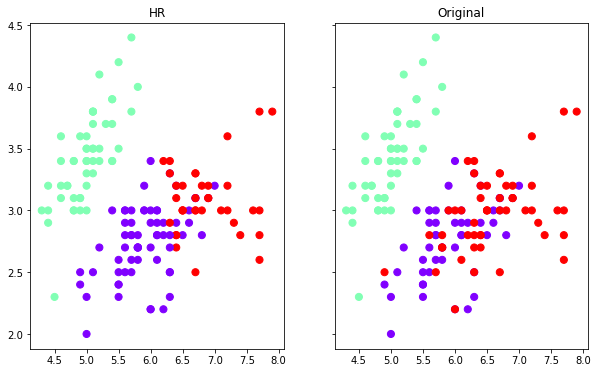

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('HR')
ax1.scatter(df.iloc[:,0], df.iloc[:,1], c = df.predicted_clusters, s = 50, cmap = "rainbow")
ax2.set_title("Original")
ax2.scatter(df.iloc[:,0], df.iloc[:,1], c = df.original_classes, s = 50, cmap = "rainbow")

# ARI Score

In [20]:
from sklearn.metrics.cluster import adjusted_rand_score

In [29]:
adjusted_rand_score(df['species'], df['predicted_clusters'])

0.7311985567707745